In [1]:
# How to train a regression model.
# Types of regression: linear, polynomial, logistic, softmax.
# Hyperparameters can be estimated by gradient descent.

# Start with Linear Regression.
# Weighted sum of parameters plus bias.
# yhat = transpose(theta) dot xvec, where theta(0)=bias and xvec(0)=1.
# Training can mean find theta that minimizes RMSE or MSE.

# In this notebook, show closed form exact solution and SVD approximation.

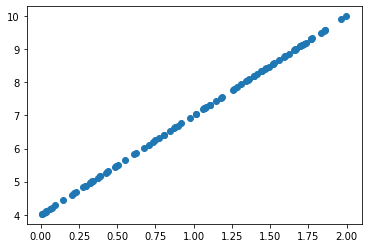

In [2]:
# Generate data for a known equation: y=4+3x.
import numpy as np
X = 2 * np.random.rand(100,1)  # 100 random numbers 0<=r<2, uniform distribtuion
y = 4 + 3 * X
import matplotlib.pyplot as plt
plt.scatter(X,y,)
plt.show()

In [3]:
# Normal equation: theta_best = (XT*X)^(-1)*XT*y
(X[:5], y[:5])

(array([[0.20213329],
        [1.6713032 ],
        [0.32148819],
        [1.85971697],
        [1.34255175]]),
 array([[4.60639988],
        [9.01390961],
        [4.96446458],
        [9.5791509 ],
        [8.02765524]]))

In [4]:
# Hyperparameters can be calculated by closed form solution = normal equation.

# Our X is 1D but in general it has columns 1..n.
# For regression, add an identitity vector to represent X0=bias.
bias = np.ones((100,1))
biasX = np.c_[bias, X] # column-wise concatenation
biasX[:5]

array([[1.        , 0.20213329],
       [1.        , 1.6713032 ],
       [1.        , 0.32148819],
       [1.        , 1.85971697],
       [1.        , 1.34255175]])

In [5]:
biasX_T = biasX.T
theta_best = np.linalg.inv(biasX_T.dot(biasX)).dot(biasX_T).dot(y)
# The parameters are learned exactly.
theta_best

array([[4.],
       [3.]])

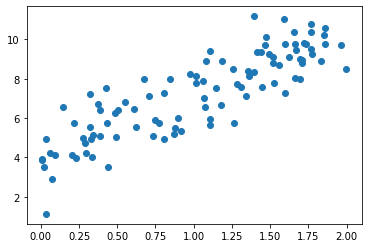

In [6]:
# Generate data with noise. Same equation: y=4+3x.
noise = np.random.randn(100,1) # 100 random numbers 0<=n<1, Gaussian distribution
y = 4 + 3 * X + noise
plt.scatter(X,y,)
plt.show()

In [7]:
# Regression on noisy data.
biasX = np.c_[np.ones((100,1)), X] # column-wise concatenation
theta_best = np.linalg.inv(biasX_T.dot(biasX)).dot(biasX_T).dot(y)
# The parameters are learned approximately.
theta_best

array([[4.05706018],
       [3.11941136]])

In [8]:
Xtest = 2 * np.random.rand(100,1)  # 100 random numbers 0<=r<2, uniform distribtuion
biasXtest = np.c_[np.ones((100,1)), Xtest] # column-wise concatenation
predictions=biasXtest.dot(theta_best)

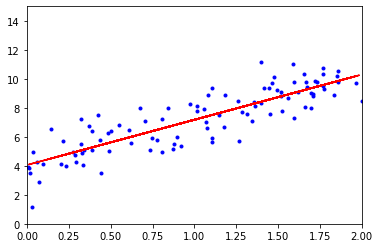

In [9]:
plt.plot(X, y, "b.")  # original data blue
plt.plot(Xtest,predictions,"r-") # computed data red
plt.axis([0,2,0,15])
plt.show()

In [10]:
# Problem with the above.
# The closed form solution is hard i.e. O(n^3).
# In fact it is unbtainable if X or XT*X is not invertible.

# The alternative is O(n^2) for n features, O(m) for m instances.
# Use Singular Value Decomposition (SVD) of X -> U*E*VT. See numpy.lnalg.svd().
# Then use pseudoinverse (Moore-Penrose inverse). See numpy.linalg.pinv().
# It also uses least squares with a minimum value e.g. 10^(-6). See np.linalg.lstsq().

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)
linreg.intercept_, linreg.coef_

(array([4.05706018]), array([[3.11941136]]))

In [11]:
preds = linreg.predict(Xtest)
(Xtest[:5], preds[:5])

(array([[0.88209505],
        [0.27729146],
        [0.20219787],
        [1.19577152],
        [1.24432427]]),
 array([[6.8086775 ],
        [4.92204633],
        [4.68779852],
        [7.78716346],
        [7.93861944]]))